# Modal Analysis

#### A quick introduction modal analysis, modes, modeshapes and participation factors

Still a work in progress, if there is anything missing or you have some general feedback please contact Sjur Føyen at foyen.sjur@ntnu.no 

## Table of Contents (ting sjur sa)

1. Ligninger med participation factors fra statspace
2. forklaring på modes of mode shpes egenvektorer
3. feks i Kundur, coherent and noncoherent (local interarea) funker kun med sammenlignbare ting elns
4. Participation for systemstudier


Relevant Material from TET4180 Power System Stability and Control:
1. Slides
2. Bok
3. Participation elns


Code implemented by; Ingrid Wiig Arnesen.

Last update; ???

In [4]:
# If you get a package error, uncomment and run the following lines:
# %pip install control
# %pip install IPython.display
# %pip install numpy
# %pip install matplotlib
# %pip install ipywidgets

import matplotlib.pyplot as plt
import numpy as np
#from notebook_utils import getPhasorsDictionary_SmallDist
#from IPython.display import display, Math
#import control as ctrl


# Eigenvalues blbla

Bare fra small signal fjern ting og skriv bare eksempel

There are a lot of tools for linear analysis of stability, we will look at stability criterion of the P-$\delta$ characteristic, modal (eigenvalue) analysis and frequency response (bode). The system has a linearized model which can be seen represented in the laplace domain in the figure below

<img src="Figures/Linearized_Plant_Model.png" width="550">

## Linearised Swing Equation from the Block Diagram
Now lets see how this linear block diagram can be recognized in the swing equation. For this analysis, we neglect the impact of the voltage regulator and rotor flux dynamics, meaning we assume that $D_\delta = 0$ and we do not look at the voltage part of the loop (as they are decoupled). Now lets set up our linearized model for analysis.

### Extracting Equations from the Block Diagram
From the block diagram, we can derive the following equations:

$$ \delta' = \frac{2\pi f_N}{s} \Delta\omega $$

$$ \Delta\omega = \frac{1}{2Hs} (P_m - D\Delta\omega - K_E' \delta' - D_s\Delta E_q') $$

Since $D_s = 0$, the equation simplifies to:

$$ \Delta\omega = \frac{1}{2Hs} P_m - \frac{D}{2H} \Delta\omega - \frac{K_E'}{2H} \delta' $$

Applying Laplace transformation ($s \rightarrow \frac{d}{dt}$ in time domain), we get:

$$ \dot{\delta} = 2\pi f_N \Delta\omega $$

$$ \Delta \dot{\omega} = - \frac{K_E'}{2H} \delta' - \frac{D}{2H} \Delta\omega + \frac{1}{2H} P_m $$

### Stability Analysis using Eigenvalues
Using the state-space representation, we can now assess the stability by looking at the eigenvalues, or modes, of the system. We find the eigenvalues through:

$$ |\lambda I - A| = 0 $$

solved as

$$ \lambda = \frac{-D}{4H} \pm \sqrt{\left( \frac{D}{4H} \right)^2 - \frac{\pi f_N K_E'}{H} } $$

The system stability depends on the real part of $\lambda$. If the real part is negative, the system is stable; otherwise, it is unstable. We can express the eigenvalues by frequency and damping ratio through
$$
f = \frac{\text{Imag}(\lambda)}{2\pi}
$$

$$
\zeta = -\frac{\text{Real}(\lambda)}{|\lambda|}
$$

The system is stable if the real part of all eigenvalues is negative. The frequency indicates the oscillation rate, and the damping ratio indicates how quickly the oscillations decay.

lambda1: (-0.5+9.695245206166463j)
lambda2: (-0.5-9.695245206166463j)


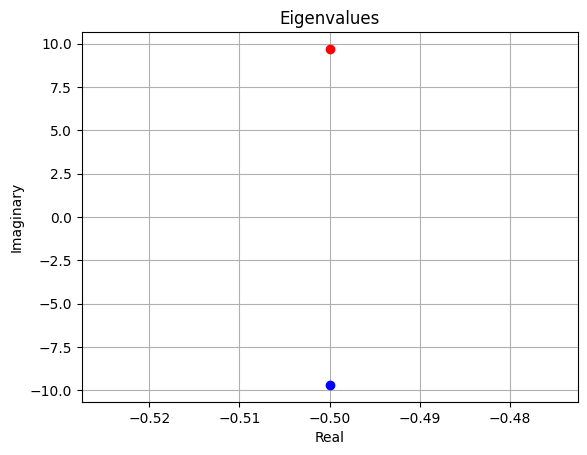

In [6]:
#Quick eigenvalues example with D = 10 and H = 10 and F_n = 50 and Ke = 3
D = 10
H = 5
f_N = 50
K_E = 3


# REGNER UT PÅ FEIL MÅTE EGT
lambda1 = (-D/(4*H)) + 1j*np.sqrt(-1*((D/(4*H))**2 - (np.pi*f_N*K_E)/H))
lambda2 = (-D/(4*H)) - 1j*np.sqrt(-1*((D/(4*H))**2 - (np.pi*f_N*K_E)/H))

print(f'lambda1: {lambda1}')
print(f'lambda2: {lambda2}')

#plot
plt.figure()
plt.plot(np.real(lambda1), np.imag(lambda1), 'ro')
plt.plot(np.real(lambda2), np.imag(lambda2), 'bo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Eigenvalues')
plt.grid()
plt.show()
